In [1]:
import requests


def download_data(url, filename):
  
  url = url + filename + '/E0.csv'
  r = requests.get(url, allow_redirects=True)

  open('season_' + filename + '.csv', 'wb').write(r.content)

In [2]:
seasons = ['0910', '1011',
           '1112', '1213', '1314', '1415', '1516', '1617', '1718', '1819', '1920',
           '2021']

data_url = 'https://www.football-data.co.uk/mmz4281/'
for season in seasons:
  download_data(data_url, season)

In [3]:
len(seasons)

12

In [154]:
import pandas as pd
season = '1415'
data= pd.read_csv("season_" + season +".csv", error_bad_lines=False)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,16/08/14,Arsenal,Crystal Palace,2.0,1.0,H,1.0,1.0,D,J Moss,14.0,4.0,6.0,2.0,13.0,19.0,9.0,3.0,2.0,2.0,0.0,1.0,1.25,6.50,15.00,1.25,5.50,12.00,1.30,5.0,9.0,1.25,6.00,13.00,1.26,6.45,14.01,1.25,5.5,12.0,1.25,5.75,12.00,1.25,6.25,10.50,50.0,1.30,1.25,6.70,5.96,16.00,12.43,48.0,1.77,1.72,2.26,2.10,24.0,-1.50,1.81,1.78,2.20,2.10,1.29,5.90,12.75
1,E0,16/08/14,Leicester,Everton,2.0,2.0,D,1.0,2.0,A,M Jones,11.0,13.0,3.0,3.0,16.0,10.0,3.0,6.0,1.0,1.0,0.0,0.0,3.20,3.40,2.40,2.90,3.20,2.40,2.90,3.3,2.3,3.25,3.40,2.25,3.14,3.38,2.46,3.10,3.1,2.4,3.00,3.30,2.38,3.20,3.40,2.40,50.0,3.30,3.06,3.45,3.32,2.42,2.36,48.0,2.10,2.00,1.90,1.80,22.0,0.25,1.88,1.85,2.10,2.02,3.11,3.40,2.47
2,E0,16/08/14,Man United,Swansea,1.0,2.0,A,0.0,1.0,A,M Dean,14.0,5.0,5.0,4.0,14.0,20.0,4.0,0.0,2.0,4.0,0.0,0.0,1.36,5.00,11.00,1.40,4.75,9.00,1.33,5.0,8.0,1.36,5.00,10.00,1.37,5.10,10.60,1.36,4.5,9.0,1.36,5.00,8.00,1.36,5.20,10.00,50.0,1.38,1.34,5.50,4.96,11.03,9.32,48.0,1.77,1.71,2.30,2.13,25.0,-1.50,2.18,2.08,1.87,1.79,1.45,4.81,8.25
3,E0,16/08/14,QPR,Hull,0.0,1.0,A,0.0,0.0,D,C Pawson,19.0,11.0,6.0,4.0,10.0,10.0,8.0,9.0,1.0,2.0,0.0,0.0,2.50,3.30,3.10,2.50,3.10,2.85,2.30,3.3,2.9,2.40,3.25,3.10,2.48,3.26,3.22,2.60,3.0,2.9,2.50,3.25,2.88,2.55,3.20,3.12,50.0,2.60,2.47,3.40,3.18,3.20,3.02,46.0,2.52,2.36,1.65,1.58,24.0,0.00,1.80,1.73,2.25,2.14,2.31,3.24,3.59
4,E0,16/08/14,Stoke,Aston Villa,0.0,1.0,A,0.0,0.0,D,A Taylor,12.0,7.0,2.0,2.0,14.0,9.0,2.0,8.0,0.0,3.0,0.0,0.0,1.95,3.50,4.50,1.95,3.30,3.90,2.00,3.3,3.6,1.95,3.40,4.20,1.95,3.47,4.55,1.95,3.2,4.2,1.95,3.40,4.00,1.95,3.30,4.75,50.0,2.00,1.92,3.50,3.38,4.80,4.27,44.0,2.42,2.31,1.67,1.60,23.0,-0.50,1.95,1.91,2.02,1.96,2.01,3.34,4.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,E0,24/05/15,Leicester,QPR,5.0,1.0,H,2.0,0.0,H,M Oliver,22.0,18.0,7.0,2.0,7.0,6.0,5.0,6.0,0.0,0.0,0.0,0.0,1.60,4.33,6.00,1.60,3.80,5.50,1.60,3.9,5.0,1.62,4.00,5.50,1.57,4.57,6.02,1.62,3.8,5.5,NaN,NaN,NaN,1.57,4.50,6.00,43.0,1.65,1.56,4.57,4.21,6.20,5.71,34.0,1.59,1.55,2.65,2.41,28.0,-1.00,1.98,1.93,1.98,1.93,1.53,4.94,6.13
377,E0,24/05/15,Man City,Southampton,2.0,0.0,H,1.0,0.0,H,C Foy,15.0,13.0,6.0,4.0,13.0,8.0,8.0,4.0,1.0,1.0,0.0,0.0,1.57,4.50,6.00,1.55,4.00,5.75,1.50,4.0,6.1,1.57,4.20,6.00,1.60,4.62,5.59,1.57,3.8,6.0,NaN,NaN,NaN,1.57,4.60,5.75,43.0,1.60,1.56,4.75,4.27,6.30,5.61,37.0,1.50,1.45,2.83,2.66,28.0,-1.00,2.00,1.94,2.03,1.93,1.60,4.35,6.00
378,E0,24/05/15,Newcastle,West Ham,2.0,0.0,H,0.0,0.0,D,M Atkinson,17.0,4.0,4.0,1.0,9.0,9.0,2.0,3.0,2.0,1.0,0.0,0.0,1.83,4.00,4.33,1.80,3.90,4.40,1.65,3.8,4.6,1.80,3.75,4.50,1.79,4.00,4.69,1.80,3.5,4.5,NaN,NaN,NaN,1.80,4.00,4.60,43.0,1.83,1.77,4.20,3.84,4.70,4.42,38.0,1.70,1.64,2.40,2.25,25.0,-0.50,1.82,1.78,2.20,2.10,1.76,4.01,4.98
379,E0,24/05/15,Stoke,Liverpool,6.0,1.0,H,5.0,0.0,H,A Taylor,15.0,13.0,9.0,4.0,13.0,4.0,3.0,9.0,4.0,2.0,0.0,0.0,3.50,3.60,2.15,3.25,3.40,2.15,3.30,3.3,2.1,3.30,3.50,2.20,3.51,3.70,2.15,3.30,3.3,2.2,NaN,NaN,NaN,3.50,3.60,2.15,42.0,3.64,3.42,3.71,3.48,2.20,2.12,41.0,1.87,1.81,2.14,1.99,25.0,0.25,2.07,2.02,1.88,1.85,3.56,3.60,2.17


In [160]:
data['HY'].isna().sum()

1

In [5]:
import numpy as np

In [6]:
len(np.unique(data['HomeTeam'].values))

20

In [7]:
def generate_pl_table(season):
  teams = []
  for team in np.unique(season['HomeTeam'].dropna().astype(str).values):
    played = 0
    wins = 0
    draws = 0
    loss = 0
    points = 0
    goals_scor = 0
    goals_conc = 0
    for i in range (len(season['HomeTeam'].dropna().astype(str))):
      if season['HomeTeam'].values[i] == team:
        played += 1
        if season['FTR'].values[i] == 'H':
          points += 3
          wins += 1
        elif season['FTR'].values[i] == 'D':
          points += 1
          draws += 1
        else:
          loss += 1
        goals_scor += season['FTHG'].values[i]
        goals_conc += season['FTAG'].values[i]

    for i in range (len(season['AwayTeam'].dropna().astype(str))):
      if season['AwayTeam'].values[i] == team:
        played += 1
        if season['FTR'].values[i] == 'A':
          points += 3
          wins += 1
        elif season['FTR'].values[i] == 'D':
          points += 1
          draws += 1
        else:
          loss += 1
        goals_scor += season['FTAG'].values[i]
        goals_conc += season['FTHG'].values[i]
    teams.append((team, int(played), int(wins), int(draws), int(loss), int(points), int(goals_scor), int(goals_conc), int(goals_scor - goals_conc)))

  table_df = pd.DataFrame(teams, columns=['Team', 'P', 'W', 'D', 'L', 'Points', 'GS','GC', 'GD'])
  table_df = table_df.sort_values(["Points", "GS"], ascending=False)
  table_df = table_df.set_index(pd.Series(list(range(1,len(teams)+1))))
  table_df = table_df.dropna()
  return table_df 

In [8]:
table_df = generate_pl_table(data)

In [9]:
table_df

,Team,P,W,D,L,Points,GS,GC,GD
1,Man City,38,27,5,6,86,83,32,51
2,Man United,38,21,11,6,74,73,44,29
3,Liverpool,38,20,9,9,69,68,42,26
4,Chelsea,38,19,10,9,67,58,36,22
5,Leicester,38,20,6,12,66,68,50,18
6,West Ham,38,19,8,11,65,62,47,15
7,Tottenham,38,18,8,12,62,68,45,23
8,Arsenal,38,18,7,13,61,55,39,16
9,Leeds,38,18,5,15,59,62,54,8
10,Everton,38,17,8,13,59,47,48,-1


In [10]:
import glob
import os

path = r'/content' # use your path
all_files = sorted(glob.glob(path + "/*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

full_data = pd.concat(li, axis=0, ignore_index=True)

In [11]:
full_data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,...,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,15/08/09,Aston Villa,Wigan,0.0,2.0,A,0.0,1.0,A,M Clattenburg,11.0,14.0,5.0,7.0,15.0,14.0,4.0,6.0,2.0,2.0,0.0,0.0,1.67,3.60,5.50,1.65,3.40,5.00,1.67,3.50,5.25,1.70,3.50,4.90,1.67,3.3,4.50,1.65,3.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,15/08/09,Blackburn,Man City,0.0,2.0,A,0.0,1.0,A,M Dean,17.0,8.0,9.0,5.0,12.0,9.0,5.0,4.0,2.0,1.0,0.0,0.0,3.60,3.25,2.10,3.40,3.15,2.00,3.40,3.25,2.10,3.20,3.20,2.20,3.00,3.2,2.10,3.15,3.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,15/08/09,Bolton,Sunderland,0.0,1.0,A,0.0,1.0,A,A Marriner,11.0,20.0,3.0,13.0,16.0,10.0,4.0,7.0,2.0,1.0,0.0,0.0,2.25,3.25,3.25,2.15,3.15,3.15,2.25,3.25,3.10,2.20,3.20,3.20,2.10,3.2,3.00,2.25,3.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,15/08/09,Chelsea,Hull,2.0,1.0,H,1.0,1.0,D,A Wiley,26.0,7.0,12.0,3.0,13.0,15.0,12.0,4.0,1.0,2.0,0.0,0.0,1.17,6.50,21.00,1.17,6.00,13.00,1.20,6.00,15.00,1.20,5.50,14.00,1.17,5.5,12.00,1.17,5.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,15/08/09,Everton,Arsenal,1.0,6.0,A,0.0,3.0,A,M Halsey,8.0,15.0,5.0,9.0,11.0,13.0,4.0,9.0,0.0,0.0,0.0,0.0,3.20,3.25,2.30,2.95,3.15,2.25,3.00,3.25,2.30,3.10,3.10,2.30,2.88,3.0,2.25,3.00,3.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4556,E0,23/05/2021,Liverpool,Crystal Palace,2.0,0.0,H,1.0,0.0,H,C Pawson,19.0,5.0,5.0,4.0,10.0,8.0,14.0,1.0,2.0,2.0,0.0,0.0,1.14,8.50,15.00,1.16,8.00,16.50,NaN,NaN,NaN,1.15,8.25,16.00,NaN,NaN,NaN,NaN,NaN,...,1.98,1.90,1.14,8.5,15.0,1.16,8.00,16.5,1.15,8.25,16.00,1.15,8.0,17.0,1.17,8.00,17.0,1.20,9.50,18.50,1.16,8.57,16.09,1.28,3.75,1.48,2.63,1.35,3.76,1.31,3.49,-2.25,1.86,2.04,1.88,2.03,1.98,2.14,1.88,2.00
4557,E0,23/05/2021,Man City,Everton,5.0,0.0,H,2.0,0.0,H,M Oliver,21.0,8.0,11.0,3.0,8.0,10.0,7.0,5.0,2.0,2.0,0.0,0.0,1.44,5.00,6.50,1.44,5.00,6.50,NaN,NaN,NaN,1.47,4.90,6.00,NaN,NaN,NaN,NaN,NaN,...,2.00,1.88,1.30,6.0,9.0,1.30,6.00,9.0,1.30,6.25,8.50,1.30,5.8,9.5,1.30,5.75,9.0,1.32,6.65,11.25,1.30,6.12,9.60,1.44,2.75,1.53,2.63,1.50,2.96,1.45,2.77,-1.75,2.01,1.89,1.99,1.89,2.20,2.00,2.03,1.85
4558,E0,23/05/2021,Sheffield United,Burnley,1.0,0.0,H,1.0,0.0,H,K Friend,12.0,10.0,3.0,3.0,11.0,1.0,8.0,9.0,3.0,1.0,0.0,0.0,2.80,3.60,2.40,2.80,3.60,2.40,NaN,NaN,NaN,2.85,3.60,2.40,NaN,NaN,NaN,NaN,NaN,...,1.79,2.11,2.80,3.4,2.5,2.75,3.50,2.5,2.75,3.40,2.55,2.88,3.5,2.4,2.80,3.50,2.5,3.08,3.67,2.63,2.80,3.47,2.53,1.80,2.00,1.86,2.03,1.89,2.17,1.79,2.05,0.00,2.04,1.86,2.05,1.86,2.17,1.90,2.03,1.84
4559,E0,23/05/2021,West Ham,Southampton,3.0,0.0,H,2.0,0.0,H,M Atkinson,14.0,17.0,7.0,5.0,5.0,9.0,2.0,3.0,0.0,3.0,0.0,0.0,1.65,4.00,5.00,1.72,4.00,4.60,NaN,NaN,NaN,1.70,4.10,4.60,NaN,NaN,NaN,NaN,NaN,...,1.92,1.96,1.7

In [12]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4561 entries, 0 to 4560
Columns: 139 entries, Div to AvgCAHA
dtypes: float64(131), object(8)
memory usage: 4.8+ MB


In [13]:
len(np.unique(full_data['HomeTeam'].dropna().astype(str).values))

38

In [14]:
full_table_df = generate_pl_table(full_data)

In [195]:
full_table_df.style.set_caption("League Table Since 2009/2010")

,Team,P,W,D,L,Points,GS,GC,GD
1,Man City,456,300,79,77,979,1014,413,601
2,Man United,455,264,104,87,896,838,446,392
3,Chelsea,456,262,97,97,883,852,462,390
4,Liverpool,456,250,106,100,856,858,487,371
5,Arsenal,456,245,101,110,836,840,516,324
6,Tottenham,456,243,102,111,831,792,506,286
7,Everton,456,179,135,142,672,635,570,65
8,West Ham,418,132,110,176,506,542,634,-92
9,Newcastle,380,122,89,169,455,449,578,-129
10,Southampton,342,115,91,136,436,437,477,-40


In [16]:
def calculate_points(team, data):
  points = 0
  for i in range (len(data['HomeTeam'].dropna().astype(str))):
      if data['HomeTeam'].values[i] == team:
        if data['FTR'].values[i] == 'H':
          points += 3
        elif data['FTR'].values[i] == 'D':
          points += 1
  for i in range (len(data['AwayTeam'].dropna().astype(str))):
    if data['AwayTeam'].values[i] == team:
      if data['FTR'].values[i] == 'A':
        points += 3
      elif data['FTR'].values[i] == 'D':
        points += 1
  return points

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

def calc_points(team, seasons):
  points = []
  for season in seasons:
    data= pd.read_csv("season_" + season + ".csv", error_bad_lines=False)
    points.append(calculate_points(team, data))
  return points

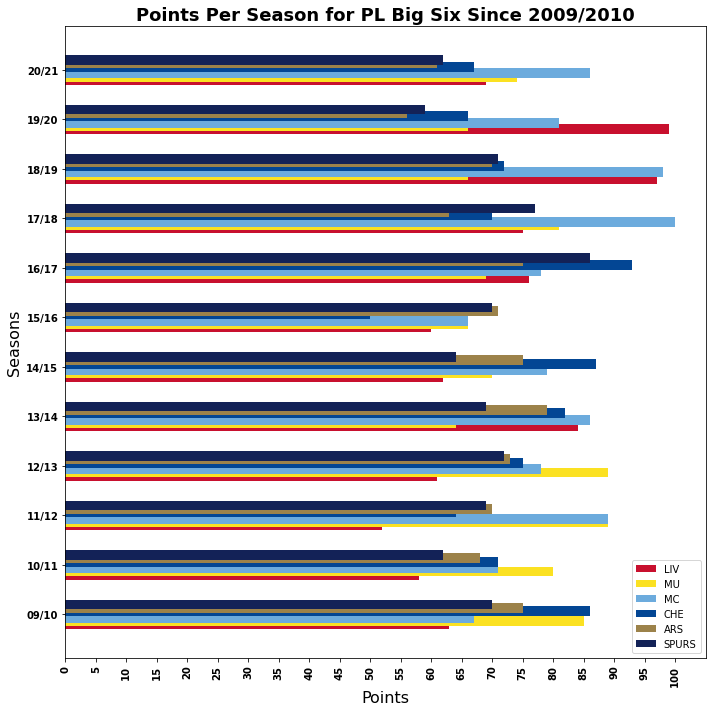

In [200]:
seas_plt = ['09/10', '10/11',
           '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20',
           '20/21']
x = np.arange(len(seas_plt))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.barh(x - width, calc_points('Liverpool', seasons), width, label='LIV', color='#C8102E')
rects2 = ax.barh(x - width*2/3, calc_points('Man United', seasons), width, label='MU', color='#FBE122')
rects3 = ax.barh(x - width/3, calc_points('Man City', seasons), width, label='MC', color='#6CABDD')
rects4 = ax.barh(x + width/3, calc_points('Chelsea', seasons), width, label='CHE', color='#034694')
rects5 = ax.barh(x + width*2/3, calc_points('Arsenal', seasons), width, label='ARS', color='#9C824A')
rects6 = ax.barh(x + width, calc_points('Tottenham', seasons), width, label='SPURS', color='#132257')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.xaxis.set_ticks(np.arange(0, 105, 5))
ax.yaxis.set_ticks(np.arange(0,12, 1))

labels = [item.get_text() for item in ax.get_yticklabels()]
labels = seas_plt
ax.set_yticklabels(labels)
ax.legend()

plt.ylabel("Seasons", fontsize = 16)
plt.xlabel("Points", fontsize = 16)
plt.xticks(rotation=90, weight = 'bold')
plt.yticks(weight = 'bold')
plt.title("Points Per Season for PL Big Six Since 2009/2010", weight = 'bold', fontsize = 18)

fig.tight_layout()

plt.show()


In [19]:
champs = []
for season in seasons:
  data= pd.read_csv("season_" + season + ".csv", error_bad_lines=False)
  table = generate_pl_table(data)
  champs.append((table['Team'][1],table['Points'][1]))

In [20]:
teams_colors = {'Liverpool': '#C8102E', 'Man United': '#FBE122', 'Man City': '#6CABDD', 'Chelsea': '#034694', 'Arsenal': '#9C824A', 'Leicester': '#003090', 'Tottenham': '#132257'}

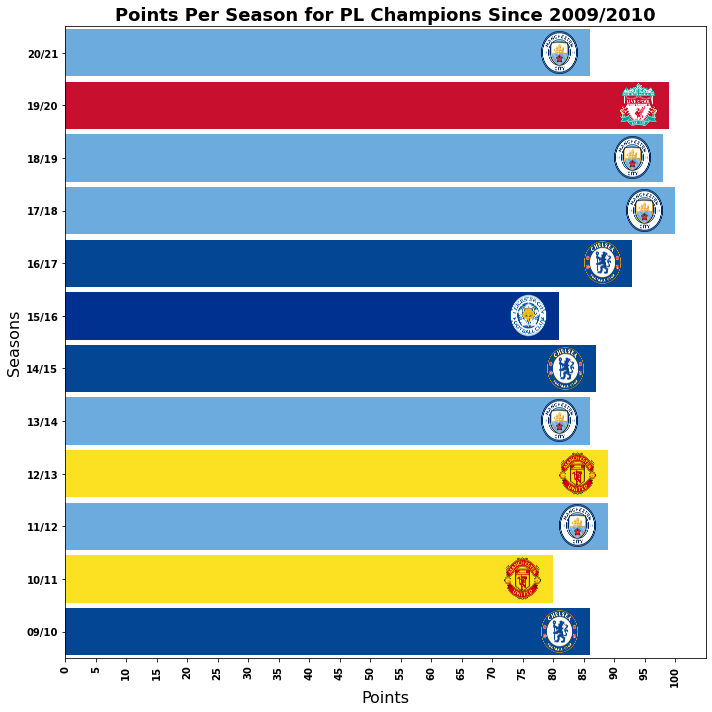

In [201]:
x, y = zip(*champs)
colors = []
for team in x:
  colors.append(teams_colors[team])
fig, ax = plt.subplots(figsize=(10, 10))
height = 0.9
plt.barh(seas_plt, y, height=height, color=colors, align='center')
height = 0.8
for i, (label, value) in enumerate(zip(x, y)):
    # load the image corresponding to label into img
    img = plt.imread(label+'.png')
    plt.imshow(img, extent=[value - 8, value - 2, i - height / 2, i + height / 2], aspect='auto', zorder=2)
plt.xlim(0, max(y) * 1.05)
plt.ylim(-0.5, len(x) - 0.5)
ax.xaxis.set_ticks(np.arange(0, 105, 5))
plt.ylabel("Seasons", fontsize = 16)
plt.xlabel("Points", fontsize = 16)
plt.xticks(rotation=90, weight = 'bold')
plt.yticks(weight = 'bold')
plt.title("Points Per Season for PL Champions Since 2009/2010", weight = 'bold', fontsize = 18)
plt.tight_layout()
plt.show()

In [22]:
top_4 = []
for season in seasons:
  data= pd.read_csv("season_" + season + ".csv", error_bad_lines=False)
  table = generate_pl_table(data)
  top_4.append(list(table['Team'][0:4].values))


In [23]:
top_4_occ = []

def unique(list1):
    x = np.array(list1)
    return np.unique(x)
teams = unique(sum(top_4, []))
for team in teams:
  top_4_occ.append((team,sum(top_4, []).count(team)))
top_4_occ.sort(key=lambda x:x[1])

In [24]:
top_4_occ


[('Leicester', 1),
 ('Liverpool', 6),
 ('Tottenham', 6),
 ('Arsenal', 7),
 ('Man United', 8),
 ('Chelsea', 9),
 ('Man City', 11)]

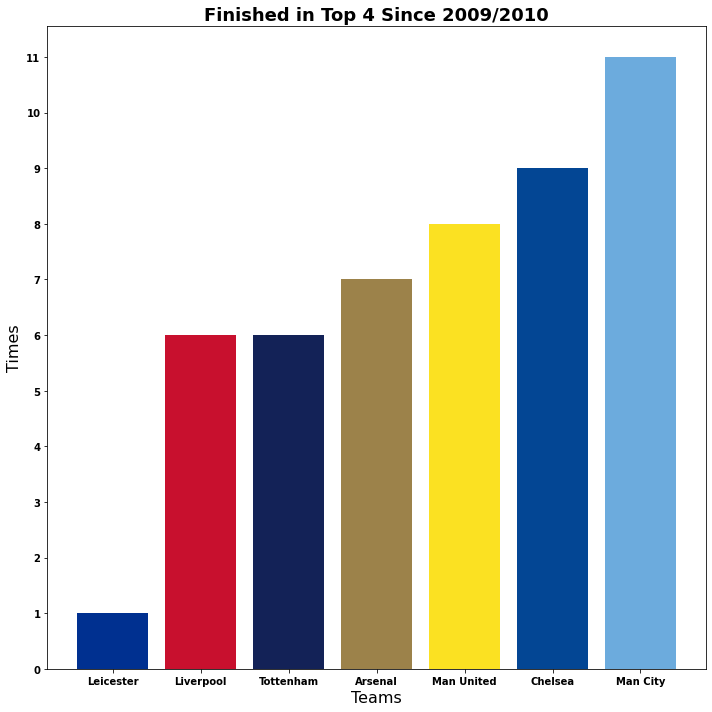

In [202]:
x, y = zip(*top_4_occ)
colors = []
for team in x:
  colors.append(teams_colors[team])
fig, ax = plt.subplots(figsize=(10, 10))
ax.yaxis.set_ticks(np.arange(0,12, 1))
plt.bar(x, y, color=colors, align='center');
plt.ylabel("Times", fontsize = 16)
plt.xlabel("Teams", fontsize = 16)
plt.xticks( weight = 'bold')
plt.yticks(weight = 'bold')
plt.title("Finished in Top 4 Since 2009/2010", weight = 'bold', fontsize = 18)
plt.tight_layout()

In [26]:
## number of home defeats over 12 seasons (graph)
def home_defeats(seasons):
  H_defeats = []
  for season in seasons:
    data= pd.read_csv("season_" + season +".csv", error_bad_lines=False)
    H_defeats.append(sum(x == 'A' for x in data['FTR'].values))
  return H_defeats

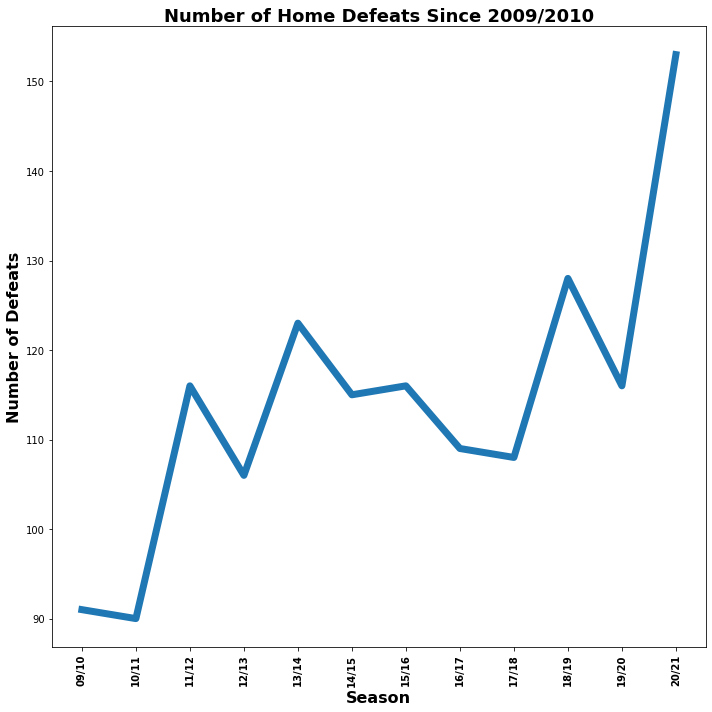

In [203]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(seas_plt,home_defeats(seasons), linewidth=7.0);
plt.ylabel("Number of Defeats", fontsize = 16, weight = 'bold')
plt.xlabel("Season", fontsize = 16, weight = 'bold')
plt.xticks(rotation=90, weight = 'bold')
plt.title("Number of Home Defeats Since 2009/2010", weight = 'bold', fontsize = 18)
plt.tight_layout()

In [28]:
## Least Home Defeats (number of defeats/number of played)
def calculate_HD(team, data):
  num = 0
  played = 0
  for i in range (len(data['HomeTeam'].dropna().astype(str))):
    if data['HomeTeam'].values[i] == team:
      played += 1
      if data['FTR'].values[i] == 'A':
        num += 1
  return num,played

In [29]:
def calculate_AW(team, data):
  num = 0
  played = 0
  for i in range (len(data['AwayTeam'].dropna().astype(str))):
    if data['AwayTeam'].values[i] == team:
      played += 1
      if data['FTR'].values[i] == 'A':
        num += 1
  return num,played

In [30]:
def home_DD(full_data):
  teams_HD = []
  for team in np.unique(full_data['HomeTeam'].dropna().astype(str).values):
    teams_HD.append((team,calculate_HD(team, full_data)[1],calculate_HD(team, full_data)[0],calculate_HD(team, full_data)[0]/calculate_HD(team, full_data)[1]))

  table_df = pd.DataFrame(teams_HD, columns=['Team', 'Played', 'Home Losses', 'Ratio'])
  table_df = table_df.sort_values(["Ratio"], ascending=True)
  table_df = table_df.set_index(pd.Series(list(range(1,len(teams_HD)+1))))
  table_df = table_df.dropna()
  return table_df

In [31]:
def Away_WW(full_data):
  teams_HD = []
  for team in np.unique(full_data['HomeTeam'].dropna().astype(str).values):
    teams_HD.append((team,calculate_AW(team, full_data)[1],calculate_AW(team, full_data)[0],calculate_AW(team, full_data)[0]/calculate_AW(team, full_data)[1]))

  table_df = pd.DataFrame(teams_HD, columns=['Team', 'Played', 'Away Wins', 'Ratio'])
  table_df = table_df.sort_values(["Ratio"], ascending=False)
  table_df = table_df.set_index(pd.Series(list(range(1,len(teams_HD)+1))))
  table_df = table_df.dropna()
  return table_df

In [32]:
least_hd_table = home_DD(full_data)

In [205]:
least_hd_table.style.set_caption('Least Home Defeats')

,Team,Played,Home Losses,Ratio
1,Man City,228,24,0.105263
2,Liverpool,228,31,0.135965
3,Chelsea,228,31,0.135965
4,Man United,228,33,0.144737
5,Arsenal,228,34,0.149123
6,Tottenham,228,41,0.179825
7,Birmingham,38,7,0.184211
8,Everton,228,53,0.232456
9,Stoke,171,51,0.298246
10,Leicester,133,40,0.300752


In [34]:
most_AW_table = Away_WW(full_data)

In [206]:
most_AW_table.style.set_caption('Most Away Wins')

,Team,Played,Away Wins,Ratio
1,Man City,228,127,0.557018
2,Leeds,19,10,0.526316
3,Man United,227,112,0.493392
4,Chelsea,228,112,0.491228
5,Liverpool,228,107,0.469298
6,Tottenham,228,101,0.442982
7,Arsenal,228,98,0.429825
8,Leicester,133,47,0.353383
9,Crystal Palace,152,47,0.309211
10,Southampton,171,50,0.292398


In [208]:
## Goal scored for champions (scatter)
champs_gls = []
for season in seasons:
  data= pd.read_csv("season_" + season + ".csv", error_bad_lines=False)
  table = generate_pl_table(data)
  champs_gls.append((table['Team'][1],table['GS'][1]))

In [209]:
champs_gls

[('Chelsea', 103),
 ('Man United', 78),
 ('Man City', 93),
 ('Man United', 86),
 ('Man City', 102),
 ('Chelsea', 73),
 ('Leicester', 68),
 ('Chelsea', 85),
 ('Man City', 106),
 ('Man City', 95),
 ('Liverpool', 85),
 ('Man City', 83)]

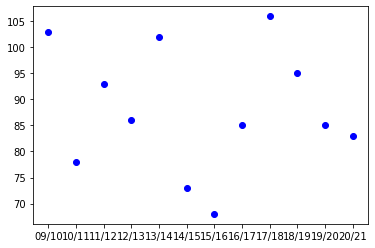

In [210]:
x,y = zip(*champs_gls)

plt.scatter(seas_plt, y, c ="blue");

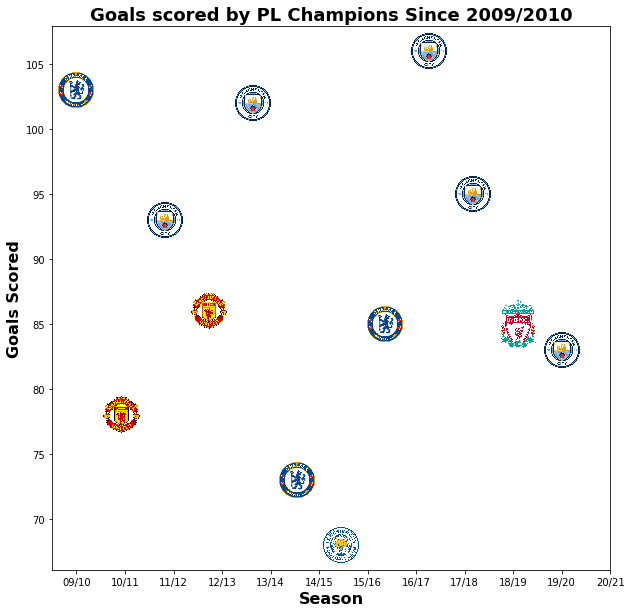

In [211]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

def plot_scatter(y,teams,seas_plt):
    x = np.linspace(0, 10, 12)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    imscatter(x, y, teams, zoom=0.03, ax=ax)
    ax.scatter(x, y)
    ax.xaxis.set_ticks(np.arange(0,12, 1))
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels = seas_plt
    ax.set_xticklabels(labels)
    plt.title("Goals scored by PL Champions Since 2009/2010", weight = 'bold', fontsize = 18)
    plt.ylabel("Goals Scored", fontsize = 16, weight = 'bold')
    plt.xlabel("Season", fontsize = 16, weight = 'bold')
    plt.show()
def getImage(path, zoom):
    return OffsetImage(plt.imread(path), zoom= zoom)

def imscatter(x, y, teams, ax=None, zoom=0.02):
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, path in zip(x, y, teams):
      ab = AnnotationBbox(getImage(path+'.png',zoom), (x0, y0), xycoords='data', frameon=False)
      artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

plot_scatter(y,x, seas_plt)

In [133]:
## Big six favourite referee
big_6 = ['Liverpool', 'Man United', 'Man City', 'Chelsea', 'Arsenal', 'Tottenham']
def most_frequent(List):
    return max(set(List), key = List.count)

def fav_referee(data, big_6):
  fav_ref = []
  for big_team in big_6 :
    referees = []
    for i in range (len(data['HomeTeam'].dropna().astype(str))):
      if data['HomeTeam'].values[i] == big_team:
        if data['FTR'].values[i] == 'H':
          referees.append(data['Referee'].values[i])
    for i in range (len(data['AwayTeam'].dropna().astype(str))):
      if data['AwayTeam'].values[i] == big_team:
        if data['FTR'].values[i] == 'A':
          referees.append(data['Referee'].values[i])
    fav_ref.append((big_team,most_frequent(referees),referees.count(most_frequent(referees))))
  table_df = pd.DataFrame(fav_ref, columns=['Team', 'Referee', 'Number of Wins'])
  table_df = table_df.set_index(pd.Series(list(range(1,len(big_6)+1))))
  table_df = table_df.dropna()
  return table_df

In [212]:
fav_referee(full_data,big_6).style.set_caption('Favourite Referees')

,Team,Referee,Number of Wins
1,Liverpool,A Taylor,25
2,Man United,J Moss,23
3,Man City,A Marriner,28
4,Chelsea,M Dean,23
5,Arsenal,J Moss,19
6,Tottenham,M Dean,21


In [98]:
## number of wins against big six
def head_to_head(data, big_6):
  h2h = []
  for big_team in big_6 :
    points = 0
    played = 0
    losses = 0
    wins = 0
    draws = 0
    for i in range (len(data['HomeTeam'].dropna().astype(str))):
      if data['HomeTeam'].values[i] == big_team and data['AwayTeam'].values[i] in big_6:
        played += 1
        if data['FTR'].values[i] == 'H':
          points += 3
          wins += 1
        elif data['FTR'].values[i] == 'D':
          points += 1
          draws += 1
        else:
          losses += 1
    for i in range (len(data['AwayTeam'].dropna().astype(str))):
      if data['AwayTeam'].values[i] == big_team and data['HomeTeam'].values[i] in big_6:
        played += 1
        if data['FTR'].values[i] == 'A':
          points += 3
          wins += 1
        elif data['FTR'].values[i] == 'D':
          points += 1
          draws += 1
        else:
          losses += 1
    
    h2h.append((big_team, played, wins, draws, losses, points))
  table_df = pd.DataFrame(h2h, columns=['Team', 'Played', 'Wins','Draws','Losses','Points'])
  table_df = table_df.sort_values(["Points"], ascending=False)
  table_df = table_df.set_index(pd.Series(list(range(1,len(big_6)+1))))
  table_df = table_df.dropna()
  return table_df

In [214]:
head_to_head(full_data,big_6).style.set_caption('Head_to_Head Table')

,Team,Played,Wins,Draws,Losses,Points
1,Man City,120,56,25,39,193
2,Man United,120,50,32,38,182
3,Liverpool,120,47,35,38,176
4,Chelsea,120,47,33,40,174
5,Tottenham,120,35,28,57,133
6,Arsenal,120,31,35,54,128


In [107]:
## pie chart percentage of games that FT score is like HT (NO REMONTADAS)
def no_remontada(data):
  assert len(data['FTR'].values) == len(data['HTR'].values)
  return np.count_nonzero(data['FTR'].values == data['HTR'].values)/len(data['FTR'].values)

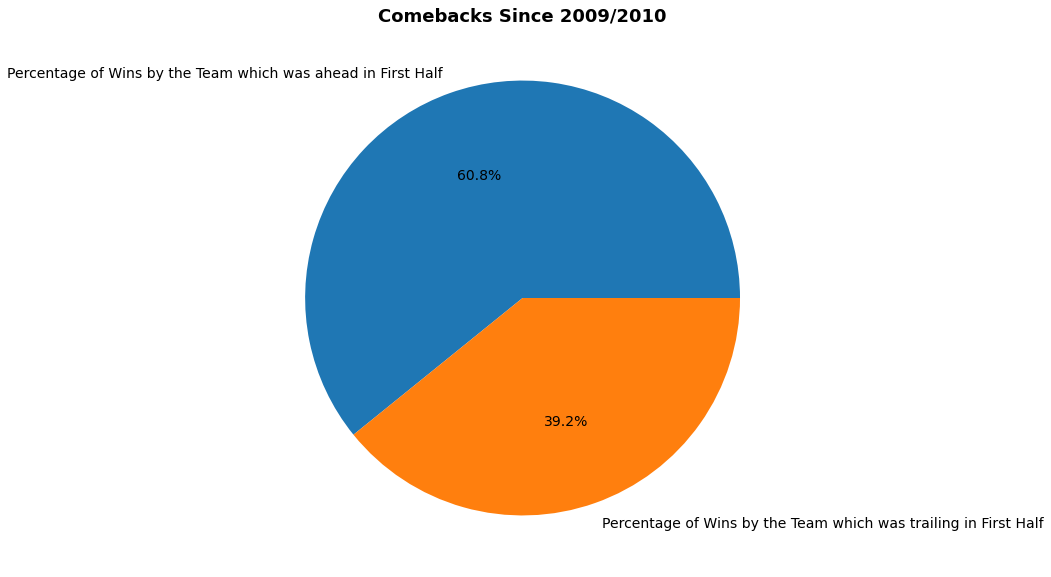

In [215]:
nr_num = no_remontada(full_data)
labels = ['Percentage of Wins by the Team which was ahead in First Half', 'Percentage of Wins by the Team which was trailing in First Half']
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Comebacks Since 2009/2010", weight = 'bold', fontsize = 18)
plt.pie([nr_num,1-nr_num], labels = labels, autopct='%1.01f%%', textprops={'fontsize': 14});

In [139]:
## BIG SIX MOST REMONTADAS in 2nd half
def big_6_comebacks(data, big_6):
  comebacks = []
  for big_team in big_6 :
    comeback = 0
    for i in range (len(data['HomeTeam'].dropna().astype(str))):
      if data['HomeTeam'].values[i] == big_team:
        if data['FTR'].values[i] == 'H' and data['HTR'].values[i] == 'A':
          comeback += 1
    for i in range (len(data['AwayTeam'].dropna().astype(str))):
      if data['AwayTeam'].values[i] == big_team:
        if data['FTR'].values[i] == 'A'and data['HTR'].values[i] == 'H':
          comeback += 1
    comebacks.append((big_team,comeback))
  table_df = pd.DataFrame(comebacks, columns=['Team', 'Comebacks'])
  table_df = table_df.sort_values(["Comebacks"], ascending=False)
  table_df = table_df.set_index(pd.Series(list(range(1,len(big_6)+1))))
  table_df = table_df.dropna()
  return table_df

In [216]:
big_6_comebacks(full_data,big_6).style.set_caption("Number of Comebacks")

,Team,Comebacks
1,Tottenham,20
2,Man United,16
3,Chelsea,16
4,Liverpool,13
5,Arsenal,9
6,Man City,5


In [164]:
## number of red cards and number of yellow cards (graph)
def calculate_card(seasons,card='y'):
  cards = []
  for season in seasons:
    data= pd.read_csv("season_" + season +".csv", error_bad_lines=False)
    if card == 'y':
      cards.append(int(sum(data['HY'].replace(np.nan, 0).values)+sum(data['AY'].replace(np.nan, 0).values)))
    else:
      cards.append(int(sum(data['HR'].replace(np.nan, 0).values)+sum(data['AR'].replace(np.nan, 0).values)))
  return cards

In [170]:
calculate_card(seasons,'y')

[1237, 1236, 1178, 1186, 1212, 1364, 1179, 1380, 1157, 1220, 1274, 1091]

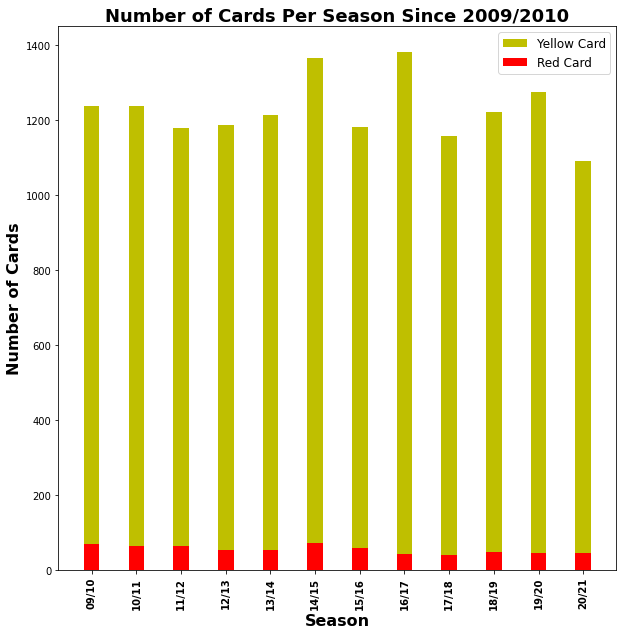

In [217]:
width = 0.35 
fig, ax = plt.subplots(figsize=(10, 10));
ax.bar(seas_plt, calculate_card(seasons,'y'), width,label='Yellow Card', color = 'y');
ax.bar(seas_plt, calculate_card(seasons,'r'), width, label='Red Card', color = 'r');
plt.ylabel("Number of Cards", fontsize = 16, weight = 'bold');
plt.xlabel("Season", fontsize = 16, weight = 'bold');
plt.xticks(rotation=90, weight = 'bold');
plt.title("Number of Cards Per Season Since 2009/2010", weight = 'bold', fontsize = 18);
ax.legend(prop={'size': 12});

In [193]:
test.style.set_caption("Big Six Head-to-Head")

,Team,Played,Wins,Draws,Losses,Points
1,Man City,120,56,25,39,193
2,Man United,120,50,32,38,182
3,Liverpool,120,47,35,38,176
4,Chelsea,120,47,33,40,174
5,Tottenham,120,35,28,57,133
6,Arsenal,120,31,35,54,128
